In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter
from scipy.signal import filtfilt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8,6]

In [2]:
pupil = pd.read_csv('pupil_positions.csv') # reading data 
pupil.tail()

,timestamp,index,id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
3836,1520.532679,4152,0,0.607715,0.749638,0.454315,40.856699,3d c++,239.884045,130.964304,...,0.100082,-0.940006,1.871305,1.671047,-1.236830,191.173124,118.262915,218.550176,218.550176,90.0
3837,1520.564616,4153,0,0.578800,0.749659,0.454246,40.579776,3d c++,239.890875,130.981014,...,0.100205,-0.939981,1.858633,1.671169,-1.236788,191.173124,118.262915,218.550176,218.550176,90.0
3838,1520.596623,4154,0,0.734832,0.749657,0.454185,41.096267,3d c++,239.890143,130.995653,...,0.100329,-0.939955,1.882296,1.671295,-1.236746,191.173124,118.262915,218.550176,218.550176,90.0
3839,1520.632638,4155,0,0.794937,0.749664,0.454111,41.366692,3d c++,239.892322,131.013415,...,0.100473,-0.939926,1.894691,1.671439,-1.236698,191.173124,118.262915,218.550176,218.550176,90.0
3840,1520.664653,4156,0,0.723771,0.749680,0.454039,41.262426,3d c++,239.897642,131.030580,...,0.100602,-0.939899,1.889926,1.671569,-1.236655,191.173124,118.262915,218.550176,218.550176,90.0


In [3]:
pupil['time']= pupil['timestamp']-pupil['timestamp'][0] # filtering time

In [4]:
#time interpolation
for ind in pupil[pupil["confidence"]<0.6].index:
    if ind-1 > 0 and ind+1 < pupil.shape[0]:
        pupil.ix[ind, "norm_pos_x"] = pupil['norm_pos_x'].mean()
        pupil.ix[ind, "norm_pos_y"] = pupil['norm_pos_y'].mean()
        pupil.ix[ind, "confidence"] = pupil['confidence'].mean()

/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/shubham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [5]:
# for ind in pupil[pupil["confidence"]<0.4].index:
#     if ind-1 > 0 and ind+1 < pupil.shape[0]:
#         pupil.ix[ind, "norm_pos_x"] = NaN
#         pupil.ix[ind, "norm_pos_y"] = NaN
#         pupil.ix[ind, "confidence"] = NaN

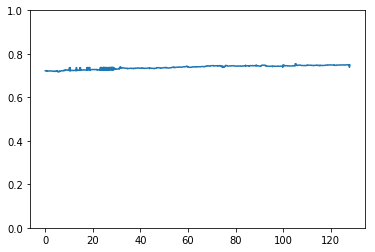

In [6]:
plt.ylim(0, 1.0) #limit at axis

plt.plot(pupil['time'],pupil['norm_pos_x'])

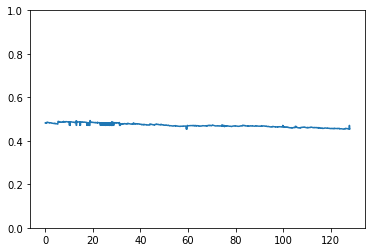

In [7]:
plt.ylim(0, 1.0)
plt.plot(pupil['time'],pupil['norm_pos_y'])

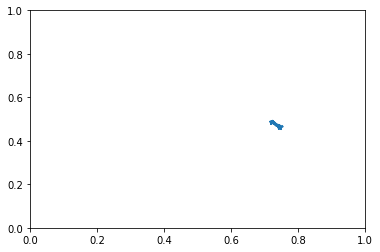

In [8]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.plot(pupil['norm_pos_x'],pupil['norm_pos_y'])

In [9]:
#slice rows
pupil_normal = pupil[: 1750]
pupil_dynamic = pupil[-1750 :]


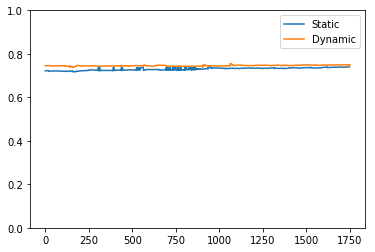

In [10]:
plt.ylim(0, 1.0)
plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_x'], label = 'Static')
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_x'], label = 'Dynamic')
plt.legend()

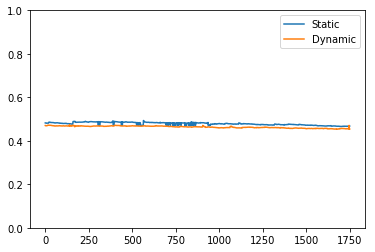

In [11]:
plt.ylim(0, 1.0)
plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_y'], label = 'Static')
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_y'], label = 'Dynamic')
plt.legend()

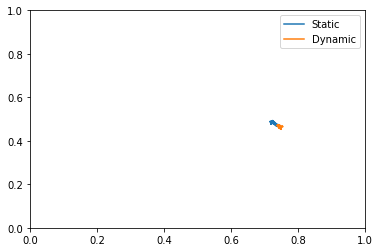

In [12]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)

plt.plot(pupil_normal.reset_index(drop=True)['norm_pos_x'], pupil_normal['norm_pos_y'],label = 'Static')
plt.plot(pupil_dynamic.reset_index(drop=True)['norm_pos_x'], pupil_dynamic['norm_pos_y'],label = 'Dynamic')
plt.legend()

In [13]:
X_1 = pupil_normal['norm_pos_x'].mean()
X_2 = pupil_dynamic['norm_pos_x'].mean()

In [14]:
Y_1 = pupil_normal['norm_pos_y'].mean()
Y_2 = pupil_dynamic['norm_pos_y'].mean()


In [15]:
print(X_1, Y_1)

0.730215115503006 0.47871978747597815


In [16]:
print(X_2, Y_2)

0.7458229837352766 0.4635719916741736


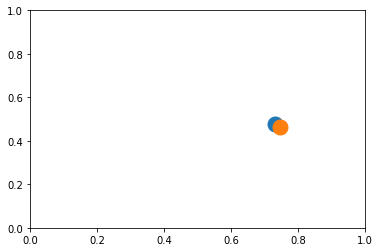

In [17]:
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.plot(X_1,Y_1,marker = 'o',markersize = 15)
plt.plot(X_2,Y_2,marker = 'o',markersize = 15)


In [18]:
from scipy.stats import ttest_ind
ttest_ind(pupil_normal['norm_pos_y'], pupil_dynamic['norm_pos_y'],equal_var = False)


Ttest_indResult(statistic=80.7376715443841, pvalue=0.0)

# MSE

In [19]:
X_mean = pupil_normal['norm_pos_x'].mean()
mse = ((X_mean - pupil_normal['norm_pos_x']) ** 2).mean(axis = None)
mse

3.5618562369161625e-05

In [20]:
Y_mean = pupil_normal['norm_pos_y'].mean()
mse = ((X_mean - pupil_normal['norm_pos_y']) ** 2).mean(axis = None)
mse

0.06328901146927428

In [23]:

mse = ((X_mean - pupil_dynamic['norm_pos_x']) ** 2).mean(axis = None)
mse

0.0002562866918652932

In [24]:

mse = ((Y_mean - pupil_dynamic['norm_pos_y']) ** 2).mean(axis = None)
mse

0.000258031493757714

# VELOCITY

In [25]:
#calculating velocity using butter worth filter
X_norm = pupil['norm_pos_x']
Y_norm = pupil['norm_pos_y']
f_s=300
f_c=2
b, a = butter(2, f_c/(f_s/2))
Y = filtfilt(b, a, Y_norm)
b, a = butter(2, f_c/(f_s/2))
X = filtfilt(b, a, X_norm)
f_c=100
def smooth(a,WSZ = 5):
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))
b, a = butter(2, f_c/(f_s/2))
dX = np.diff(filtfilt(b, a, X) * f_s)
dX = smooth(dX)
f_c=100
b, a = butter(2, f_c/(f_s/2))
dY = np.diff(filtfilt(b, a, Y) * f_s)
dY = smooth(dY)


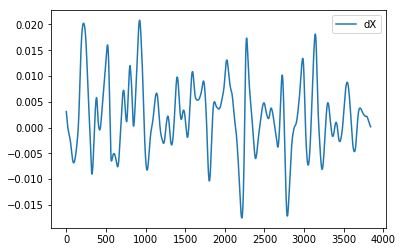

In [26]:
plt.plot(dX, label = 'dX')
plt.legend()

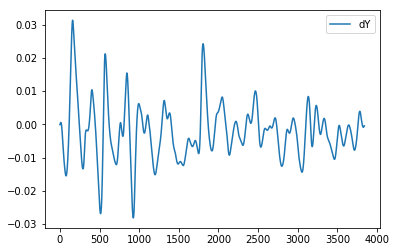

In [29]:
plt.plot(dY, label = 'dY')
plt.legend()